In [36]:
#allow output from every line 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
from pybaseball import lahman
lahman.download_lahman()
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [ ]:
##### The goal of this research is to determine a basic relationship between Homeruns and Wins for the 2019 mlb season. 
#####IS there a strong enough relationship if any? What can we draw fom it?

In [37]:
teams = lahman.teams()
teams_2019 = teams[["yearID","franchID","W","L","R","AB","H","2B","3B","HR","BB","SO","SB","CS","HBP","SF","RA","ER","ERA"]][teams.yearID ==2019]
teams_2019['RD']=teams_2019['R']-teams_2019['RA']
teams_2019['Wpct'] = teams_2019['W']/(teams_2019['W']+teams_2019['L'])
pd.set_option("display.max_rows", None, "display.max_columns", None) 
teams_2019

,yearID,franchID,W,L,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,RD,Wpct
2895,2019,ARI,85,77,813,5633,1419,288,40,220,540.0,1360.0,88.0,14.0,70.0,40.0,743,691,4.25,70,0.524691
2896,2019,ATL,97,65,855,5560,1432,277,29,249,619.0,1467.0,89.0,28.0,60.0,35.0,743,675,4.19,112,0.598765
2897,2019,BAL,54,108,729,5596,1379,252,25,213,462.0,1435.0,84.0,30.0,71.0,37.0,981,897,5.59,-252,0.333333
2898,2019,BOS,84,78,901,5770,1554,345,27,245,590.0,1382.0,68.0,30.0,49.0,44.0,828,768,4.70,73,0.518519
2899,2019,CHW,72,89,708,5529,1443,260,20,182,378.0,1549.0,63.0,28.0,66.0,32.0,832,769,4.90,-124,0.447205
2900,2019,CHC,84,78,814,5461,1378,270,26,256,581.0,1460.0,45.0,24.0,83.0,39.0,717,657,4.10,97,0.518519
2901,2019,CIN,75,87,701,5450,1328,235,27,227,492.0,1436.0,80.0,38.0,89.0,33.0,711,668,4.18,-10,0.462963
2902,2019,CLE,93,69,769,5425,1354,286,18,223,563.0,1332.0,103.0,35.0,50.0,46.0,657,601,3.76,112,0.574074
2903,2019,COL,71,91,835,5660,1502,323,41,224,489.0,1503.0,71.0,31.0,43.0,43.0,958,895,5.56,-123,0.438272
2904,2019,DET,47,114,582,5549,1333,292,41,149,391.0,1595.0,57.0,20.0,48.0,42.0,915,835,5.24,-333,0.291925


In [38]:
wpct_HR_ols_formula = "Wpct~HR"
wpct_HR_ols_model = smf.ols(formula=wpct_HR_ols_formula, data =teams_2019).fit()
wpct_HR_ols_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wpct   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     38.99
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           9.51e-07
Time:                        00:15:41   Log-Likelihood:                 40.721
No. Observations:                  30   AIC:                            -77.44
Df Residuals:                      28   BIC:                            -74.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0951      0.066      1.443      0.160      -0.040       0.230
HR             0.0018      0.000      6.244      0.000       0.001       0.002
==============================================================================
Omnibus:                        1.064   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.587   Jarque-Bera (JB):                0.995
Skew:                          -0.400   Prob(JB):                        0.608
Kurtosis:                       2.604   Cond. No.                     1.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
residuals = wpct_HR_ols_model.resid
fitted = wpct_HR_ols_model.fittedvalues
top2 = abs(residuals).sort_values(ascending =False)[:2]

<IPython.core.display.Javascript object>


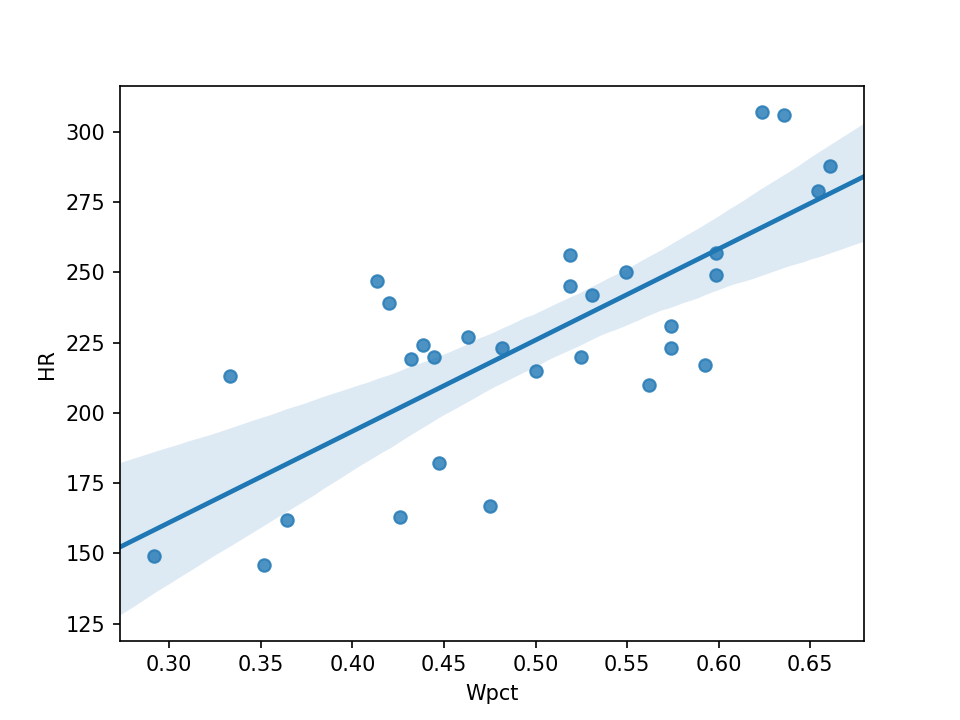

In [40]:
sns.regplot('Wpct','HR', data=teams_2019)

<IPython.core.display.Javascript object>


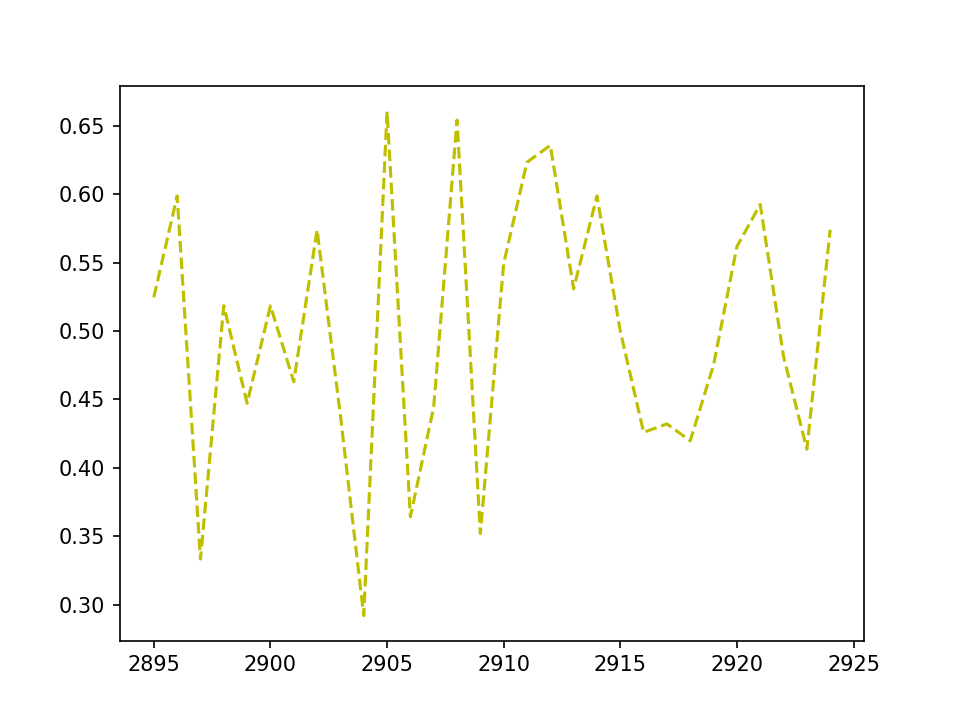

<IPython.core.display.Javascript object>


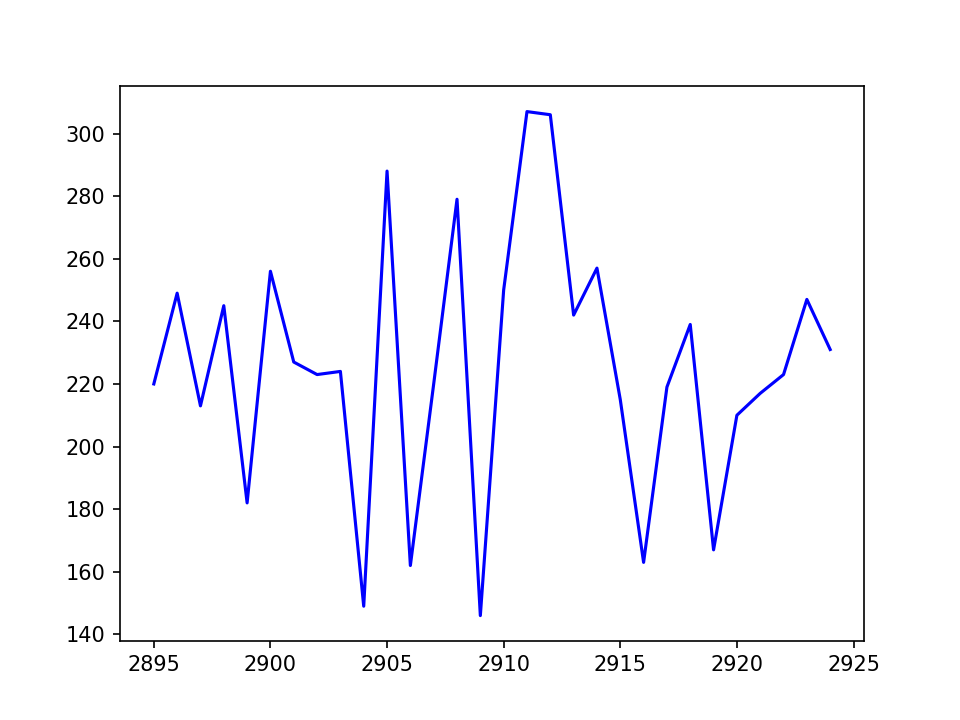

In [60]:
fig=plt.figure()
plt.plot(teams_2019.Wpct, color='y', linestyle="--")
fig=plt.figure()
plt.plot(teams_2019.HR, color = 'b', linestyle="-")

<IPython.core.display.Javascript object>


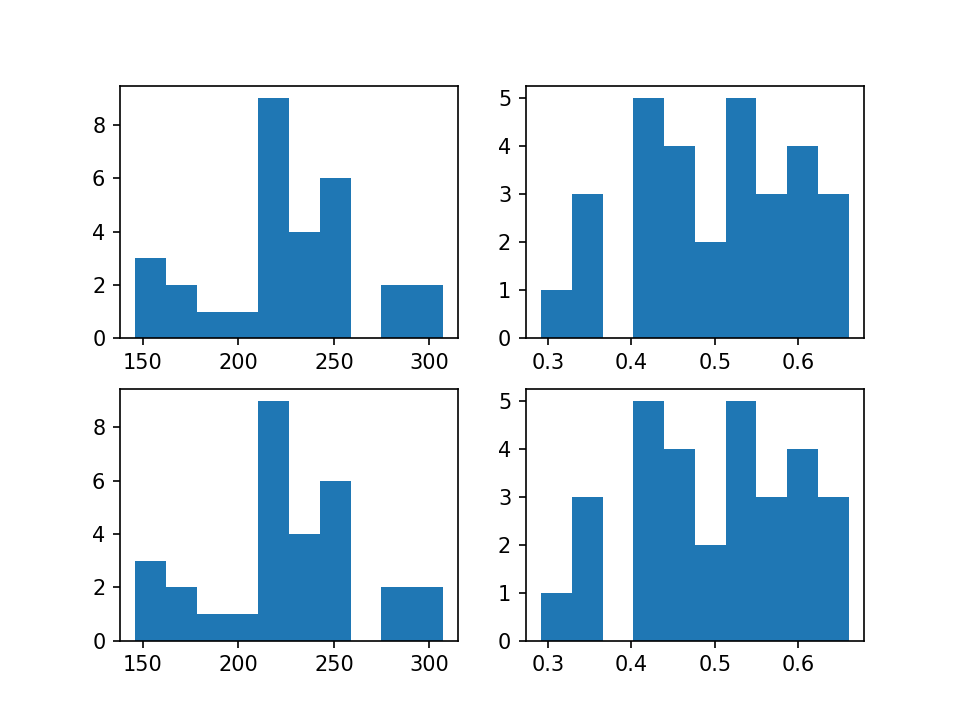

(array([3., 2., 1., 1., 9., 4., 6., 0., 2., 2.]),
 array([146. , 162.1, 178.2, 194.3, 210.4, 226.5, 242.6, 258.7, 274.8,
        290.9, 307. ]),
 <a list of 10 Patch objects>)

(array([1., 3., 0., 5., 4., 2., 5., 3., 4., 3.]),
 array([0.29192547, 0.3287823 , 0.36563914, 0.40249597, 0.43935281,
        0.47620965, 0.51306648, 0.54992332, 0.58678015, 0.62363699,
        0.66049383]),
 <a list of 10 Patch objects>)

(array([3., 2., 1., 1., 9., 4., 6., 0., 2., 2.]),
 array([146. , 162.1, 178.2, 194.3, 210.4, 226.5, 242.6, 258.7, 274.8,
        290.9, 307. ]),
 <a list of 10 Patch objects>)

(array([1., 3., 0., 5., 4., 2., 5., 3., 4., 3.]),
 array([0.29192547, 0.3287823 , 0.36563914, 0.40249597, 0.43935281,
        0.47620965, 0.51306648, 0.54992332, 0.58678015, 0.62363699,
        0.66049383]),
 <a list of 10 Patch objects>)

In [45]:
fig, axes = plt.subplots(2,2)
axes[0,0].hist(teams_2019.HR)
axes[0,1].hist(teams_2019.Wpct)
axes[1,0].hist(teams_2019.HR)
axes[1,1].hist(teams_2019.Wpct)

<IPython.core.display.Javascript object>


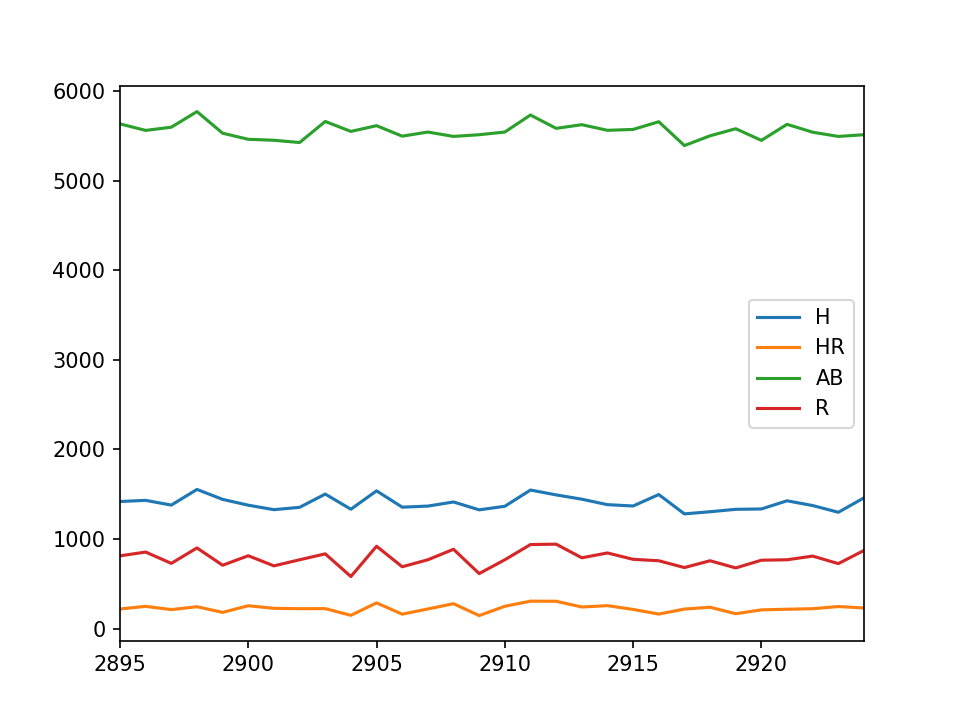

In [57]:
teams_2019[['H','HR','AB','R']].plot()

<IPython.core.display.Javascript object>


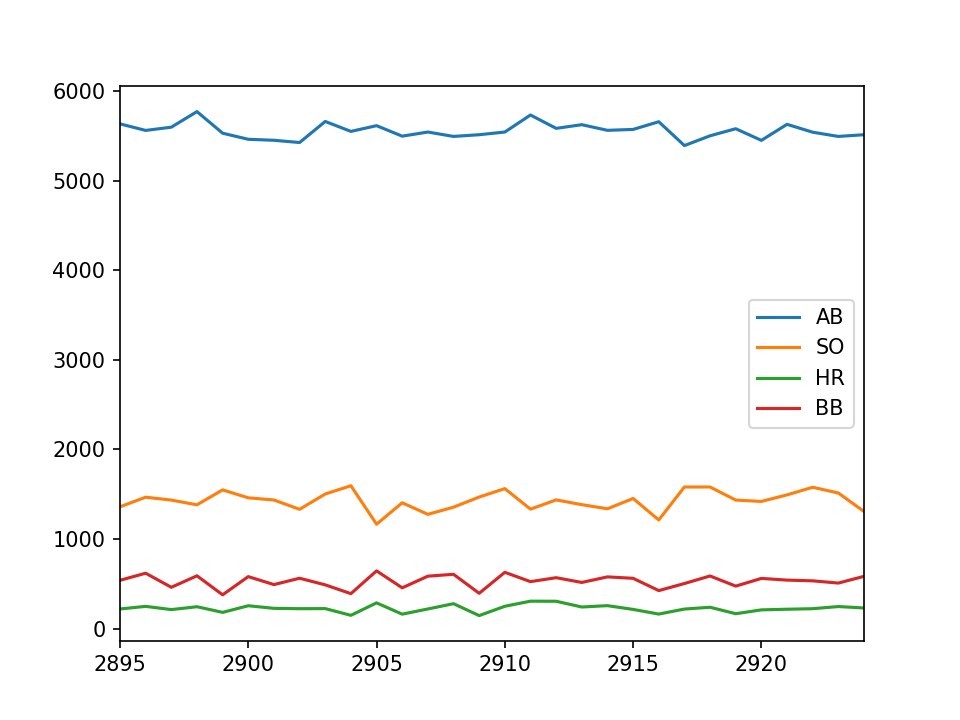

In [59]:
teams_2019[['AB','SO','HR','BB']].plot()

In [61]:
html = urlopen('http://www.baseball-reference.com/leagues/MLB/2019.shtml')
bs = BeautifulSoup(html.read(),'lxml')
tables = bs.find_all('table',{"class":"sortable"})
len(tables)
stats_table = pd.read_html(str(tables))
batting_stats=stats_table[0][:-3]
pd.set_option("display.max_rows", None, "display.max_columns", None)
batting_stats

1

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,ARI,45,28.7,5.02,162,6315,5633,813,1419,288,40,220,778,88,14,540,1360,.252,.323,.434,.757,94,2447,120,70,31,40,36,1119
1,ATL,50,28.0,5.28,162,6302,5560,855,1432,277,29,249,824,89,28,619,1467,.258,.336,.452,.789,99,2514,104,60,25,35,39,1138
2,BAL,58,26.5,4.50,162,6189,5596,729,1379,252,25,213,698,84,30,462,1435,.246,.310,.415,.725,91,2320,111,71,22,37,8,1063
3,BOS,47,27.3,5.56,162,6475,5770,901,1554,345,27,245,857,68,30,590,1382,.269,.340,.466,.806,107,2688,127,49,20,44,36,1170
4,CHC,52,27.7,5.02,162,6195,5461,814,1378,270,26,256,783,45,24,581,1460,.252,.331,.452,.783,100,2468,127,83,30,39,33,1071
5,CHW,47,27.6,4.40,161,6042,5529,708,1443,260,20,182,676,63,28,378,1549,.261,.314,.414,.728,94,2289,114,66,36,32,13,1071
6,CIN,47,27.8,4.33,162,6100,5450,701,1328,235,27,227,679,80,38,492,1436,.244,.315,.422,.736,88,2298,111,89,30,33,25,1073
7,CLE,54,27.7,4.75,162,6124,5425,769,1354,286,18,223,731,103,35,563,1332,.250,.323,.432,.756,95,2345,110,50,40,46,30,1072
8,COL,50,28.2,5.15,162,6288,5660,835,1502,323,41,224,803,71,31,489,1503,.265,.326,.456,.782,87,2579,111,43,51,43,25,1075
9,DET,53,27.6,3.61,161,6039,5549,582,1333,292,41,149,556,57,20,391,1595,.240,.294,.388,.682,78,2154,108,48,9,42,14,1069
